In [6]:
pip install inflect 

  Using cached inflect-7.5.0-py3-none-any.whl.metadata (24 kB)
  Using cached typeguard-4.4.2-py3-none-any.whl.metadata (3.8 kB)
Using cached inflect-7.5.0-py3-none-any.whl (35 kB)
Using cached typeguard-4.4.2-py3-none-any.whl (35 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import inflect
import re

p = inflect.engine()

def convert_numbers_to_words(text):
    words = text.split()
    new_text = []
    for word in words:
        if word.isdigit():  
            new_text.append(p.number_to_words(word))  
        else:
            new_text.append(word)
    return " ".join(new_text)

text = "I have 10 apples and 5 bananas"
corrected_text = convert_numbers_to_words(text)
print(corrected_text)  


I have ten apples and five bananas


In [8]:

print(p.number_to_words(123))

one hundred and twenty-three


🎤 Speak now...
✅ Recording done.


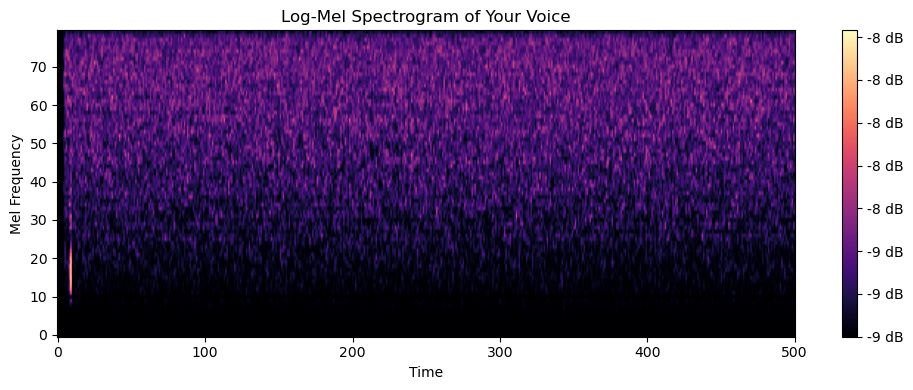

In [9]:
import numpy as np
import sounddevice as sd
import scipy.signal
import matplotlib.pyplot as plt
import wave

# Record audio
duration = 5  # seconds
sample_rate = 16000

print("🎤 Speak now...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()
print("✅ Recording done.")

# Flatten the mono channel
audio = audio.flatten()

# Parameters
n_fft = 400
hop_length = 160
n_mels = 80
win_length = n_fft
window = np.hanning(win_length)

# Compute STFT
frequencies, times, stft = scipy.signal.stft(audio, fs=sample_rate, window=window,
                                             nperseg=n_fft, noverlap=n_fft - hop_length,
                                             nfft=n_fft)
spectrogram = np.abs(stft)**2

# Mel filterbank
def mel_filterbank(sr, n_fft, n_mels):
    def hz_to_mel(hz): return 2595 * np.log10(1 + hz / 700)
    def mel_to_hz(mel): return 700 * (10**(mel / 2595) - 1)

    mel_points = np.linspace(hz_to_mel(0), hz_to_mel(sr // 2), n_mels + 2)
    hz_points = mel_to_hz(mel_points)
    bin = np.floor((n_fft + 1) * hz_points / sr).astype(int)

    fb = np.zeros((n_mels, n_fft // 2 + 1))
    for m in range(1, n_mels + 1):
        f_m1, f_m, f_m2 = bin[m - 1], bin[m], bin[m + 1]
        for k in range(f_m1, f_m):
            fb[m - 1, k] = (k - f_m1) / (f_m - f_m1)
        for k in range(f_m, f_m2):
            fb[m - 1, k] = (f_m2 - k) / (f_m2 - f_m)
    return fb

mel_fb = mel_filterbank(sample_rate, n_fft, n_mels)
mel_spec = np.dot(mel_fb, spectrogram)
log_mel_spec = np.log10(mel_spec + 1e-9)

# Plot the log-Mel spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(log_mel_spec, aspect='auto', origin='lower', cmap='magma')
plt.title("Log-Mel Spectrogram of Your Voice")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


🎤 Speak now (10 seconds)...
✅ Recording done.


d:\anaconda\Lib\site-packages\whisper\transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")



📝 Recognized Text:



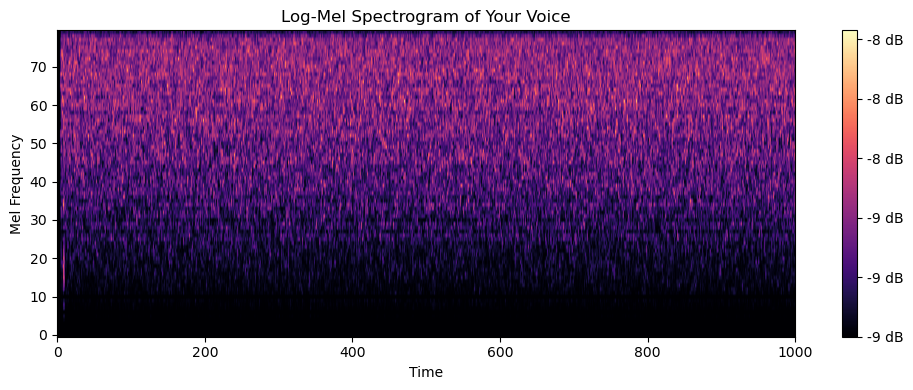

In [10]:
import numpy as np
import sounddevice as sd
import scipy.signal
import matplotlib.pyplot as plt
import torch
import whisper
import tempfile
import wave

duration = 10  
sample_rate = 16000

print("🎤 Speak now (10 seconds)...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()
print("✅ Recording done.")

audio = audio.flatten()

with tempfile.NamedTemporaryFile(suffix=".wav", delete=False) as tmpfile:
    with wave.open(tmpfile.name, 'wb') as wf:
        wf.setnchannels(1)
        wf.setsampwidth(2)  
        wf.setframerate(sample_rate)
        int16_audio = (audio * 32767).astype(np.int16)
        wf.writeframes(int16_audio.tobytes())
    audio_path = tmpfile.name


model = whisper.load_model("base")  

result = model.transcribe(audio_path)
print("\n📝 Recognized Text:")
print(result["text"])

n_fft = 400
hop_length = 160
n_mels = 80
win_length = n_fft
window = np.hanning(win_length)

frequencies, times, stft = scipy.signal.stft(audio, fs=sample_rate, window=window,
                                             nperseg=n_fft, noverlap=n_fft - hop_length,
                                             nfft=n_fft)
spectrogram = np.abs(stft)**2

def mel_filterbank(sr, n_fft, n_mels):
    def hz_to_mel(hz): return 2595 * np.log10(1 + hz / 700)
    def mel_to_hz(mel): return 700 * (10**(mel / 2595) - 1)
    mel_points = np.linspace(hz_to_mel(0), hz_to_mel(sr // 2), n_mels + 2)
    hz_points = mel_to_hz(mel_points)
    bin = np.floor((n_fft + 1) * hz_points / sr).astype(int)

    fb = np.zeros((n_mels, n_fft // 2 + 1))
    for m in range(1, n_mels + 1):
        f_m1, f_m, f_m2 = bin[m - 1], bin[m], bin[m + 1]
        for k in range(f_m1, f_m):
            fb[m - 1, k] = (k - f_m1) / (f_m - f_m1)
        for k in range(f_m, f_m2):
            fb[m - 1, k] = (f_m2 - k) / (f_m2 - f_m)
    return fb

mel_fb = mel_filterbank(sample_rate, n_fft, n_mels)
mel_spec = np.dot(mel_fb, spectrogram)
log_mel_spec = np.log10(mel_spec + 1e-9)

plt.figure(figsize=(10, 4))
plt.imshow(log_mel_spec, aspect='auto', origin='lower', cmap='magma')
plt.title("Log-Mel Spectrogram of Your Voice")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


Brighter yellow regions = more intense (louder) frequencies

Darker purple regions = softer/absent frequencies

Recording...
Recording complete!


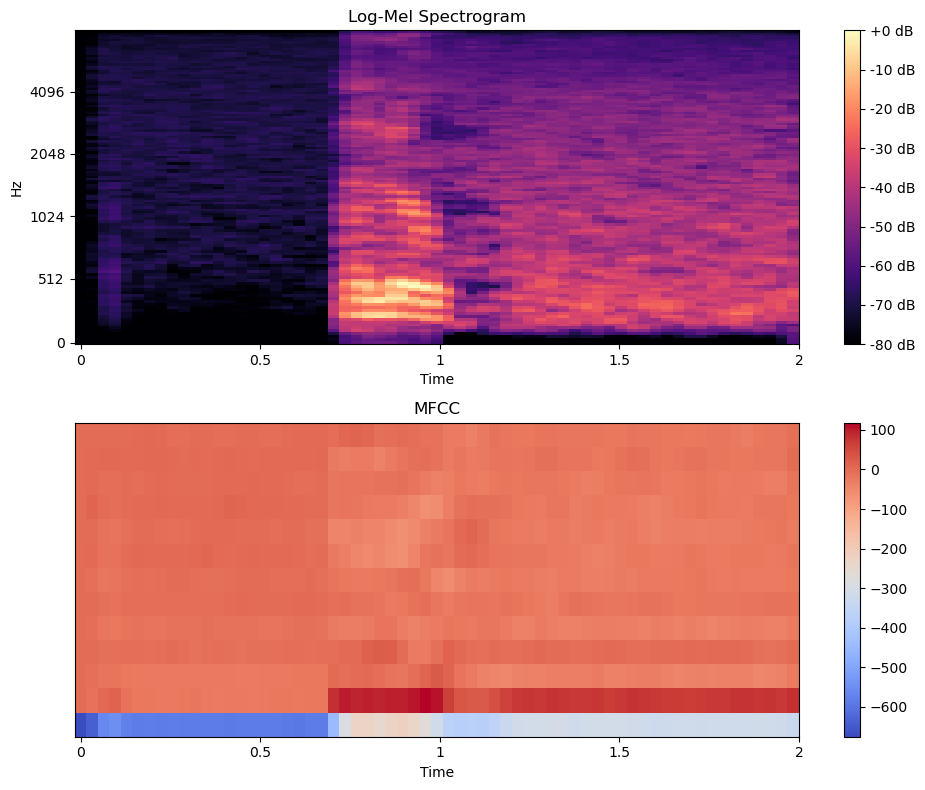

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import librosa
import librosa.display

# Record 2 seconds of audio
duration = 2  # seconds
sample_rate = 16000
print("Recording...")
audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()
audio = audio.flatten()
print("Recording complete!")

# Generate Log-Mel Spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=128)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Generate MFCCs
mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

# Plot both
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

img1 = librosa.display.specshow(log_mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel', ax=axs[0])
axs[0].set_title('Log-Mel Spectrogram')
fig.colorbar(img1, ax=axs[0], format='%+2.0f dB')

img2 = librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time', ax=axs[1])
axs[1].set_title('MFCC')
fig.colorbar(img2, ax=axs[1])

plt.tight_layout()
plt.show()
